In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
import datetime

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
macro = pd.read_csv('data/macro.csv')

## DATA Statistics 데이터 통계 

In [4]:
print(train.index)
print()
print(train.columns)

RangeIndex(start=0, stop=21570, step=1)

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)


## Data Shapes

In [5]:
print(train.shape[0], train.shape[1]) ## rows * columns

21570 292


## Feature Values 

In [6]:
train.head() ## Nan 값 포함 

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
1,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
2,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
3,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
4,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000


## Input Data & information

In [7]:
macro.info() ## 2484 entires(rows)* 100 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 100 columns):
timestamp                                     2484 non-null object
oil_urals                                     2484 non-null float64
gdp_quart                                     2394 non-null float64
gdp_quart_growth                              2394 non-null float64
cpi                                           2453 non-null float64
ppi                                           2453 non-null float64
gdp_deflator                                  2119 non-null float64
balance_trade                                 2453 non-null float64
balance_trade_growth                          2394 non-null float64
usdrub                                        2481 non-null float64
eurrub                                        2481 non-null float64
brent                                         2481 non-null float64
net_capital_export                            2088 non-null float64
gdp_annua

In [8]:
macro.describe() ## 2484 rows * 96 columns

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.000000,2394.000000,2394.000000,2453.000000,2453.000000,2119.000000,2453.000000,2394.000000,2481.000000,2481.000000,...,730.000000,2191.000000,1461.00000,2191.000000,1461.000000,1826.000000,1461.00000,1461.000000,1826.000000,1826.000000
mean,86.467157,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,480.500000,8691.922410,580.51540,0.443398,1245.543463,349902.577766,25.06859,67.800034,36282.434830,230615.059255
std,27.528709,3187.074480,2.875659,65.895969,70.286366,14.818429,3.878104,16.988727,15.006583,13.905912,...,209.643641,1668.967502,37.98811,0.016061,162.526951,72146.453110,2.44944,5.168602,10761.669111,2944.879242
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,271.000000,6221.000000,527.00000,0.410000,993.000000,269768.000000,22.37000,63.030000,22825.000000,226047.300000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,271.000000,6943.000000,565.00000,0.439390,1240.000000,288177.000000,23.01000,64.120000,23587.000000,229294.800000
50%,101.416500,17442.100000,1.300000,393.000000,473.500000,108.299000,16.041000,10.500000,32.316500,42.862200,...,480.500000,8522.000000,603.00000,0.450700,1309.000000,329348.000000,23.01000,67.850000,42551.000000,230310.000000
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,690.000000,10311.000000,603.00000,0.453560,1309.000000,398451.000000,26.70000,67.850000,46080.000000,232840.200000
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,690.000000,10805.000000,627.00000,0.458880,1440.000000,463938.000000,28.20000,76.200000,46352.000000,234576.900000


## Distribution of Price Doc 

* 화폐단위는 루블이며 하기와 같이 평균 가격은 약 7,109,162.414 루블로 한화로 약 141,614,515.29 원이다(1억 4천만)
* outlier 중에 1,500,000 루블 (한화 약 3000천만원) 가격대의 집들이 있다. 
* Maximum price 111,111,112 루블이며 한화로 약 22억원이다. 
* 2,500,000 루블 미만의 거래들은 약 1685채이며 총 21570 거래건의 약 7.8 %를 차지한다= outlier 차지 하고 있는 7.8% 의 거래가 있음을 보여준다. 


In [9]:
x = train.price_doc.values
pd.DataFrame(x)

,0
0,6000000
1,13100000
2,16331452
3,5500000
4,2000000
5,5300000
6,2000000
7,4650000
8,4800000
9,5100000


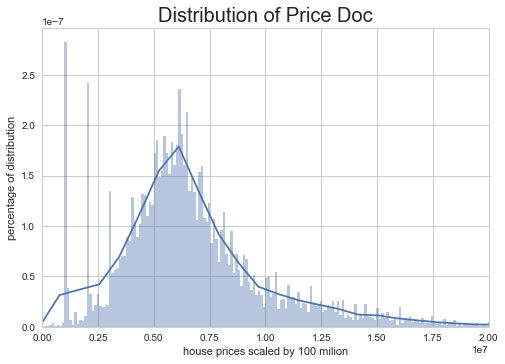

In [10]:
target = train.price_doc.values
pd.DataFrame(target)
sns.distplot(target, bins=1000)
plt.xlim(0,0.2*100000000)
plt.title('Distribution of Price Doc',size = 20)
plt.xlabel('house prices scaled by 100 milion')
plt.ylabel('percentage of distribution')
plt.figure(figsize = (200,150))


In [11]:
train["logprice_doc"] = np.log(train.price_doc  + 1)

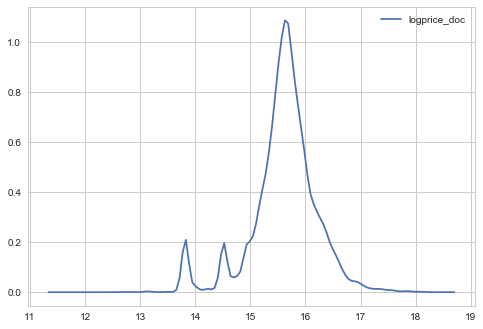

In [12]:
sns.kdeplot(train.logprice_doc)
plt.show()

In [13]:
pd_values = pd.DataFrame(train.price_doc.values+1)

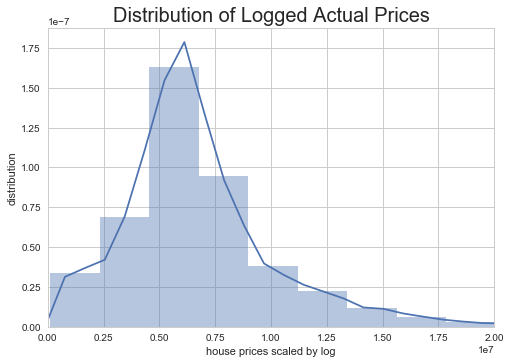

In [14]:
log_x = np.log(pd_values) ## normalizing (log를 하면 정규분포를 따른다... )

sns.distplot(x)
plt.xlim(0, 0.2*100000000)
plt.title('Distribution of Logged Actual Prices',size = 20)
plt.xlabel('house prices scaled by log')
plt.ylabel('distribution')
plt.figure(figsize = (200,150))

In [15]:
print('{:,} is maximum price' .format(x.max()))
print('{:,} is minimum price'. format(x.min()))
print('{:,.3f} is mean price of the houses'.format(x.mean()))

111,111,112 is maximum price
100,000 is minimum price
7,109,162.414 is mean price of the houses


In [16]:
portion = train.price_doc[lambda x : x < 0.25*10000000] 
len(portion)/len(train.price_doc)
## 2,500,000 루블 미만의 거래들은 약 1685채이며 총 21570 거래건의 약 7.8 %를 차지한다 

0.07811775614279091

In [17]:

## 2,500,000 루블 미만의 거래 = outlier 로 표시될수 있으며 하기와 같이 표로 표시되었다 이들의 평균 가격은 약 1,529,699루블이다 
b= train[train.price_doc < 0.25*10000000][['sub_area','price_doc']]
#
#b['mean_under 2,500,000'] = b.price_doc.aggregate(np.mean)
#b.sort_values('sub_area',ascending=True)
c = b.groupby('sub_area')['price_doc'].aggregate(np.mean)
d =pd.DataFrame(c.sort_values(ascending=False))
d

,price_doc
sub_area,
Poselenie Voronovskoe,2.460405e+06
Poselenie Vnukovskoe,2.236016e+06
Poselenie Filimonkovskoe,2.223110e+06
Poselenie Voskresenskoe,2.198340e+06
Poselenie Rogovskoe,2.159850e+06
Poselenie Moskovskij,2.117212e+06
Poselenie Shherbinka,2.093569e+06
Tverskoe,2.068861e+06
Poselenie Sosenskoe,2.007430e+06


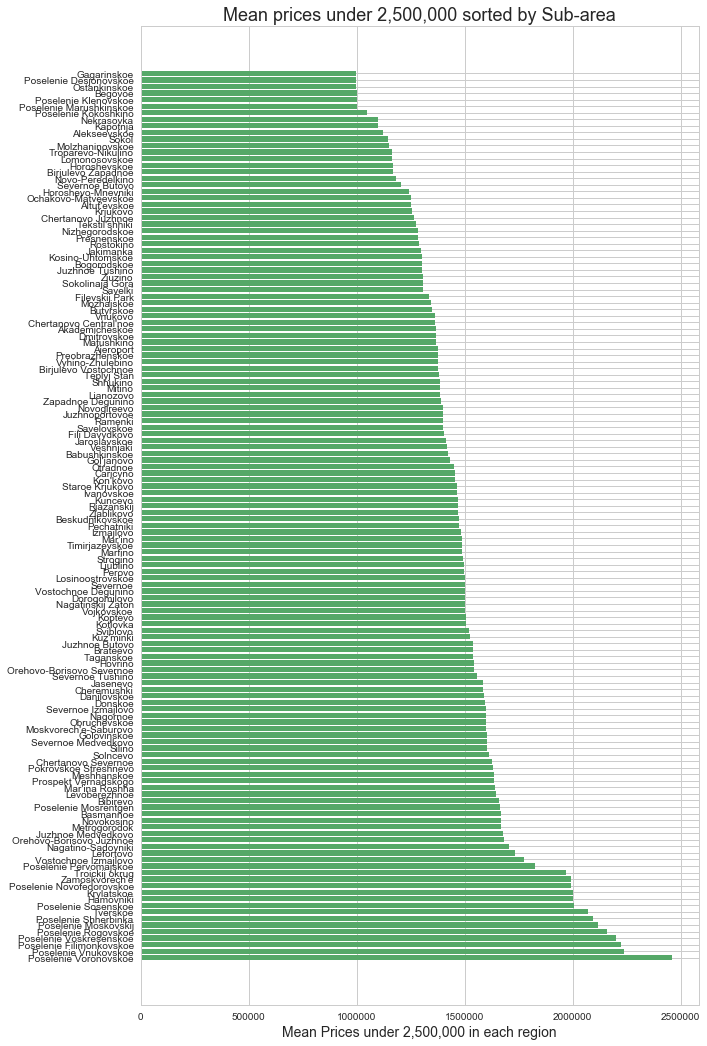

In [18]:
fig, ax = plt.subplots(figsize=(10,18))
ind = np.arange(d.shape[0])
bargraph= ax.barh(ind, d.price_doc,color ='g')
d.index
ax.set_yticks(ind)
ax.set_yticklabels(d.index)
ax.set_xlabel("Mean Prices under 2,500,000 in each region", fontsize = 14)
ax.set_title("Mean prices under 2,500,000 sorted by Sub-area", fontsize = 18)



In [19]:
sample_df = pd.read_csv('data/train.csv', usecols = ['sub_area', 'price_doc'])
sample_df
area_groups = sample_df.groupby(['sub_area'])
area_groups.groups.values()


dict_values([Int64Index([  175,   200,   369,   410,   897,  1037,  1172,  1195,  1203,
             1274,  1520,  1674,  1709,  1960,  2088,  2121,  2138,  2224,
             2262,  2368,  2627,  2644,  3369,  3638,  4271,  4376,  4803,
             4947,  4951,  5119,  5254,  5864,  6632,  6751,  7873,  8080,
             8155,  8324,  8395,  8638,  9065,  9233,  9954, 10011, 10160,
            10235, 11691, 11737, 11793, 11920, 12072, 12272, 13287, 13523,
            13552, 13572, 13868, 14182, 14241, 14321, 14873, 14912, 14935,
            15392, 15477, 15831, 16023, 16979, 17304, 17627, 17668, 17693,
            17741, 18058, 18237, 18314, 18356, 18530, 18650, 18762, 18904,
            18955, 19192, 19330, 19464, 20225, 21434],
           dtype='int64'), Int64Index([  121,   337,   366,   467,   666,   831,   956,  1018,  1039,
             1140,
            ...
            19838, 19925, 20085, 20234, 20245, 20284, 20991, 21076, 21181,
            21240],
           dtype='int64',

In [20]:
## 하기의 가격은 지역당 주택거래 평균 가격을 설명해준다 

area_groups.aggregate(np.mean)
# train_file['mean_price'] = train_file.price_doc
#len(area_groups.groups) ## 146개 sub_area
mean_prices = area_groups.aggregate(np.mean).sort_values('price_doc',ascending = False)

#mean_prices['counts'] = mean_prices.count()
mean_prices

,price_doc
sub_area,
Hamovniki,2.067690e+07
Zamoskvorech'e,1.730049e+07
Obruchevskoe,1.461425e+07
Lomonosovskoe,1.388963e+07
Presnenskoe,1.351742e+07
Gagarinskoe,1.330248e+07
Kurkino,1.294354e+07
Sokol'niki,1.275635e+07
Arbat,1.274375e+07


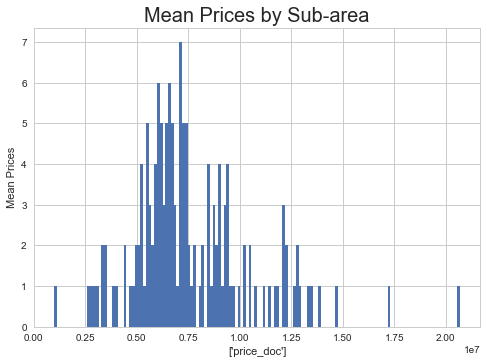

In [21]:
mean_prices
## 상위 3위 지역: Hamovniki 이 다른 지방에 비해 평균가격이 제일 높고  Zamoskvorech'e,Obruchevskoe 순이다.Hamovniki  지역은 다른 지역에 비해 평균가격이 약 30프로 정도 더 비싸다 
## 하위 3위 지역: Molzhaninovskoe(거래수 3개),Poselenie Novofedorovskoe(거래수99개).Poselenie Klenovskoe(거래수 1개)
plt.hist( mean_prices.price_doc,bins = len(mean_prices))
plt.title('Mean Prices by Sub-area',size = 20)
plt.ylabel('Mean Prices')
plt.xlabel(mean_prices.columns.values)


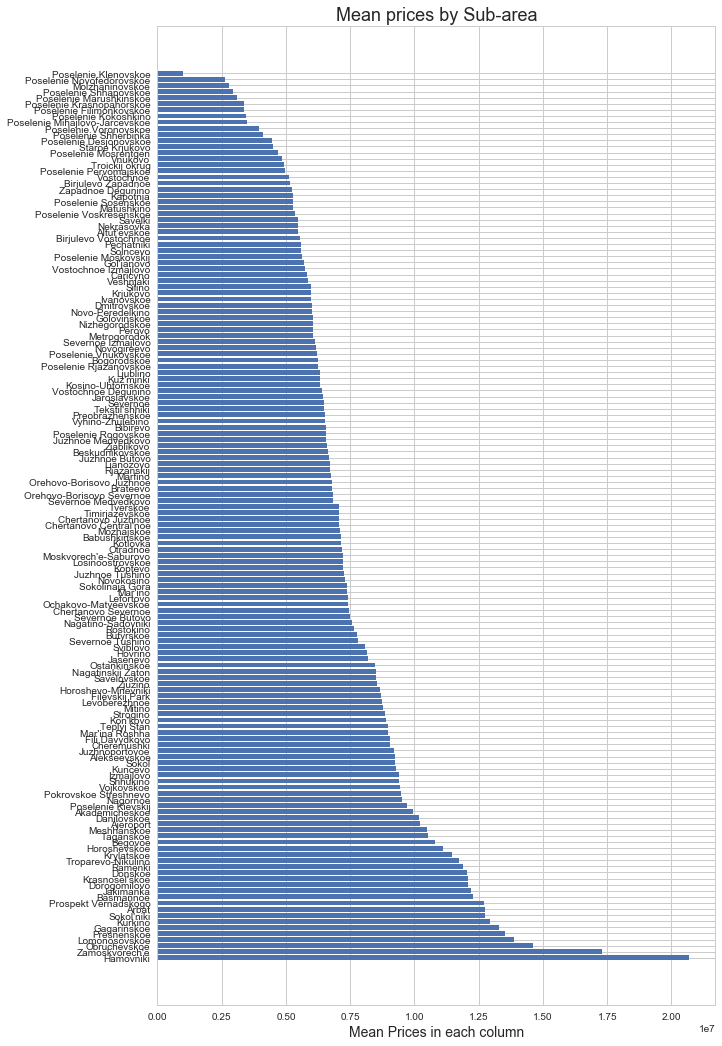

In [22]:
## 지역에 따른 평균 거래가격이 격차가 있는 지역을 말해줌 - 지역소득에 따라 격차가 있는 것으로 추정됨 
fig, ax = plt.subplots(figsize=(10,18))
ind = np.arange(mean_prices.shape[0])
bargraph= ax.barh(ind, mean_prices.price_doc)

ax.set_yticks(ind)
ax.set_yticklabels(mean_prices.index)
ax.set_xlabel("Mean Prices in each column", fontsize = 14)
ax.set_title("Mean prices by Sub-area", fontsize = 18)

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(0, 70000000)

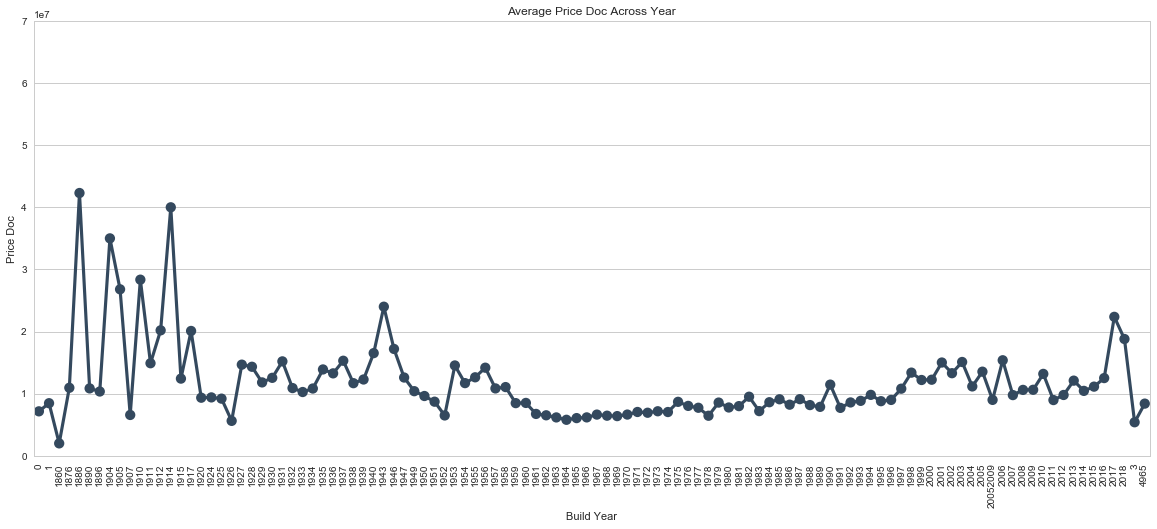

In [28]:
## 하기의 그림은 건설된 주택의 건축연도에 따른 평균 가격을 보여줌 
## 오래된 고택일수록 편차가 심함, 각개의 주택 컨디션에 따라 indivisual 가격이 달라짐을 보여줌
## 1960~2015 건축년도의 주택가격은 편차가 심하지 않으나 최근 3년동안에 지어진 새주택은 편차가 있음을 보여줌 
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
trainBuild = train.dropna()
trainBuild["yearbuilt"] = trainBuild["build_year"].map(lambda x:str(x).split(".")[0])
trainBuildGrouped = trainBuild.groupby(["yearbuilt"])["price_doc"].mean().to_frame().reset_index()
sns.pointplot(x=trainBuildGrouped["yearbuilt"], y=trainBuildGrouped["price_doc"], data=trainBuildGrouped, join=True,ax=ax,color="#34495e")
ax.set(xlabel='Build Year', ylabel='Price Doc',title="Average Price Doc Across Year",label='big')
plt.xticks(rotation=90)
plt.ylim([0,70000000])

## Transactions by Year 
* 2014 기점에 제일 많은 거래 기록을 알 수 있다, 그 이후 1년 동안 제일 가파른 감소세를 보인다.
## 월별 거래가격 평균값 => 12월 4분기가 제일 가격이 낮음 = > 이유 : Macro 경제지표 확인필요 
* 

In [30]:
Tran = train.timestamp.values
list(Tran)
len(Tran)
a=len(year_2011),len(year_2012),len(year_2013),len(year_2014),len(year_2015),len(year_2016)
list(a)

NameError: name 'year_2011' is not defined

In [31]:
Tran_df = pd.DataFrame(Tran)
#Tran_df[0].value_counts()

#Tran_df[0].split('-')


#copy = Tran_df.copy()
#copy['year'] = Tran_df[0]

#year_group = copy.groupby(lambda year: year.split('-')[0]) 
#Tran_df.set_index('timestamp', inplace = True)
Tran_df

year_2011 = []
year_2012 = []
year_2013 = []
year_2014 = []
year_2015 = []
year_2016 = []

for values in list(Tran):
    if '2011' in values:
        year_2011.append(values)
    if '2012' in values:
        year_2012.append(values)
    if '2013' in values:
        year_2013.append(values)
    if '2014' in values:
        year_2014.append(values)
    if '2015' in values:
        year_2015.append(values)
    if '2016' in values:
        year_2016.append(values)
years = ['2011', '2012', '2013', '2014', '2015','2016']
counts = [len(year_2011),len(year_2012),len(year_2013),len(year_2014),len(year_2015),len(year_2016)]


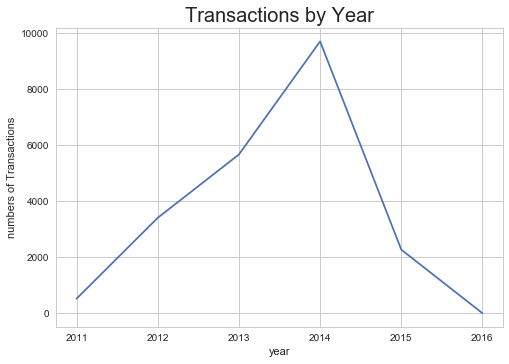

In [32]:

plt.plot(years,counts)
plt.xlabel('year')
plt.ylabel('numbers of Transactions')
plt.title('Transactions by Year',fontsize = 20)

In [33]:
years = ['2011', '2012', '2013', '2014', '2015','2016']
counts = [len(year_2011),len(year_2012),len(year_2013),len(year_2014),len(year_2015),len(year_2016)]

def f(years):
    return counts
    

## Average price over time

In [34]:
year_2011 = []
year_2012 = []
year_2013 = []
year_2014 = []
year_2015 = []
year_2016 = []

groups = train.groupby(['timestamp','price_doc'])
groups.groups

for date, prices in groups.groups:
    if '2011' in date:
        year_2011.append(prices)
    if '2012' in date:
        year_2012.append(prices)
    if '2013' in date:
        year_2013.append(prices)
    if '2014' in date:
        year_2014.append(prices)
    if '2015' in date:
        year_2015.append(prices)
    if '2016' in date:
        year_2016.append(prices)


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


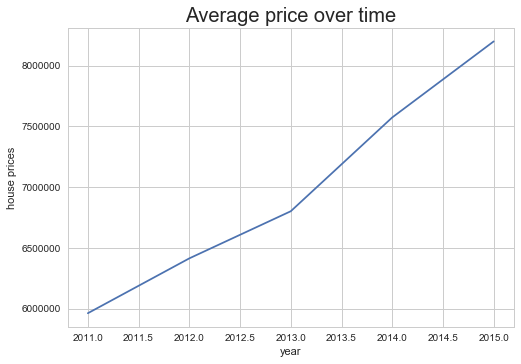

In [35]:
import numpy as np

years = ['2011', '2012', '2013', '2014', '2015','2016']
average = [np.mean(year_2011),np.mean(year_2012),np.mean(year_2013),np.mean(year_2014),np.mean(year_2015),np.mean(year_2016)]

plt.plot(years,average)
plt.xlabel('year')
plt.ylabel('house prices')
plt.title('Average price over time',fontsize = 20)

## Time Analysis
* days, months 단위의 시계열 분석, 거래가격의 평균과 최대 최소가격을 알려준다 


In [42]:
sample_df = pd.read_csv('data/train.csv', usecols = ['timestamp', 'price_doc'])
area_groups = sample_df.groupby(['timestamp'])

time_prices = area_groups.aggregate(np.mean)

time_prices['counts'] = area_groups.count()
time_prices

df = pd.DataFrame({'timestamp': time_prices.index.values, 'mean prices by time': time_prices.price_doc.values})
df_list = list(time_prices.price_doc.values)
#df_list

#df

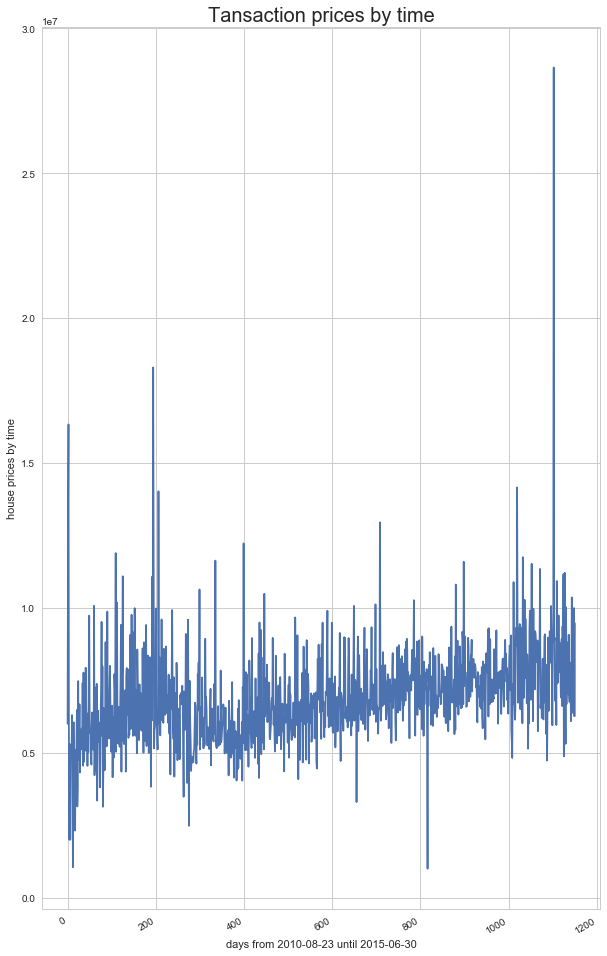

In [43]:
## 월별 거래가격 평균값 => 12월 4분기가 제일 가격이 낮음 
## indivisual 주택에 따른 가격이 편차가 있음 

import matplotlib as mpl
fig, ax = plt.subplots(figsize=(10,18))
start = datetime.datetime(2010,8,23)
stop = datetime.datetime(2015,6,30)
delta = datetime.timedelta(days =1)
## len(time_prices) = 1151 rows
dates = mpl.dates.drange(start,stop,delta)
values = time_prices

ax.plot(df_list,linestyle='-',marker='')
#date_format = mpl.dates.DateFormatter('%y-%-m-%d')
#ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
plt.xlabel('days from 2010-08-23 until 2015-06-30')
plt.ylabel('house prices by time')
plt.title('Tansaction prices by time',size = 20)

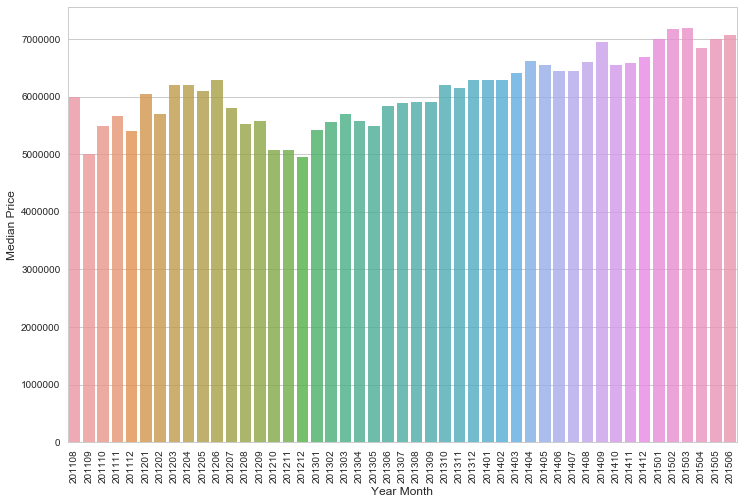

In [44]:
## 월별 거래가격 평균값 => 12월 4분기가 제일 가격이 낮음 = > 이유 : Macro 경제지표 확인필요 
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
grouped_file = train.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_file.yearmonth.values, grouped_file.price_doc.values, alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [45]:
import datetime
def trans_date(arr): 
    return datetime.datetime.strptime(arr, '%Y-%m-%d').date()
train['date'] = train['timestamp'].apply(trans_date)
train['year'] = train.date.apply(lambda x : x.year)
trans_date('2011-03-09')
train['month_num'] = train.date.apply(lambda x: x.month + 12*(x.year-2011))
train['month'] = train.date.apply(lambda x : x.month)
start_date = train.date.min()
train['diff_date'] = train['date'].apply(lambda x: (x - start_date).days)
train['price'] = train.price_doc.values

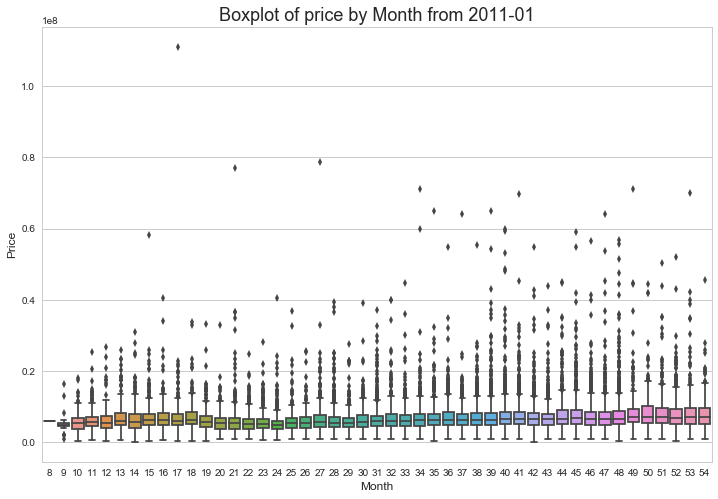

In [46]:
month_num_count = train.groupby('month_num').count().reset_index()
month_num_count = train.groupby('month_num').size().reset_index()
month_num_count.columns = ['month_num', 'Count']
plt.figure(figsize=(12,8))
#plt.plot(month_num_count.columns[0],month_num_count.columns[1] )
sns.boxplot(x = 'month_num', y = 'price', data = train)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of price by Month from 2011-01', fontsize = 18)

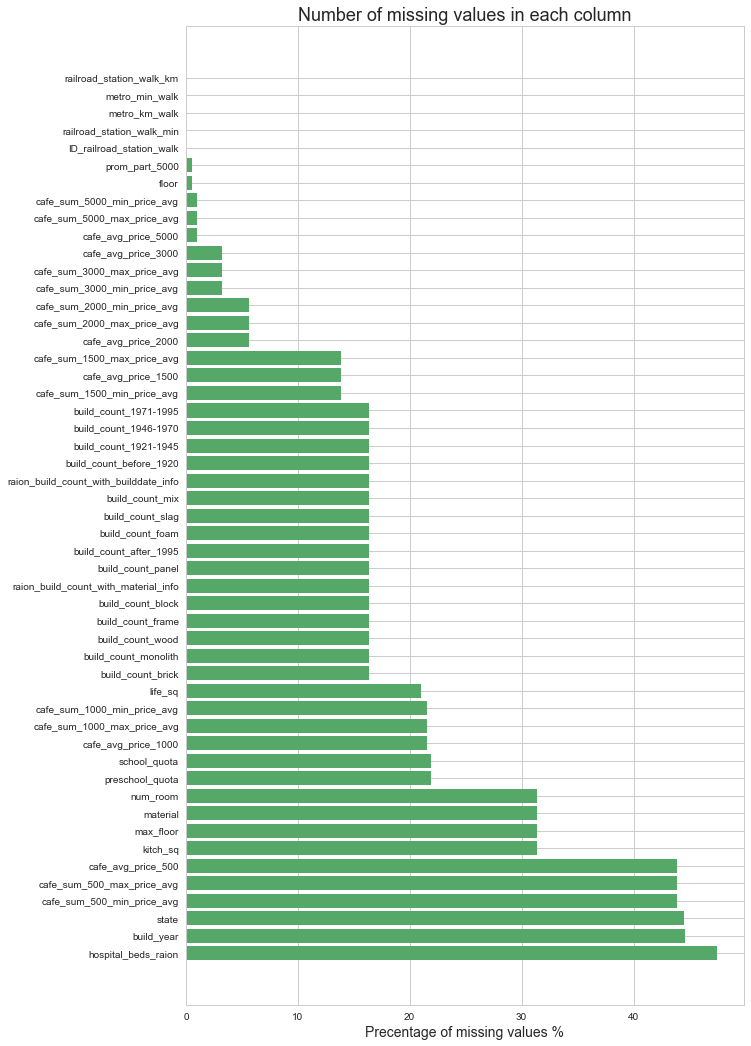

In [47]:
## Missing data analysis & Imputation
#* 약 2.1만건중 feature value 들의 missing data 퍼센테이지를 보여준다
#* 카테고리값 또는 boolean등의 분류 feature들 포함이다. 
#* 이들 feature 중요도에 따라 걸러낸 후 missing data 를 채워넣을 예정이다.
## Missing data: train data set 

missing = train.isnull().sum(0).reset_index()
missing.columns = ['column', 'count']
missing = missing.sort_values(by = 'count', ascending = False).loc[missing['count'] > 0]
missing['percentage'] = missing['count'] / float(train.shape[0]) * 100
ind = np.arange(missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, missing.percentage.values, color='g')
ax.set_yticks(ind)
ax.set_yticklabels(missing.column.values, rotation='horizontal')
ax.set_xlabel("Precentage of missing values %", fontsize = 14)
ax.set_title("Number of missing values in each column", fontsize = 18)
plt.show()

## Macro Features 경제지표영향 
* 2012년 말에 oil 가격 의 큰 변동폭이 있음을 알려준다 이시기는 월별 거래가격 평균값에서 큰 변동폭을 보인 12월 4분기와 일치한다
* Crud oil과 Brent Oil 가격이 올라가면 Ruble/USD 가격이 주츰하며(루블강세), 2015년에 오일가격이 하락하면서 Ruble/USD 가격이 상승함에 따라 달러가 강세 

In [48]:
macro = pd.read_csv('data/macro.csv')

In [49]:
macro.describe()
#macro.info() 
#macro.shape ## 100 개 features , 2484 data set 

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.000000,2394.000000,2394.000000,2453.000000,2453.000000,2119.000000,2453.000000,2394.000000,2481.000000,2481.000000,...,730.000000,2191.000000,1461.00000,2191.000000,1461.000000,1826.000000,1461.00000,1461.000000,1826.000000,1826.000000
mean,86.467157,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,480.500000,8691.922410,580.51540,0.443398,1245.543463,349902.577766,25.06859,67.800034,36282.434830,230615.059255
std,27.528709,3187.074480,2.875659,65.895969,70.286366,14.818429,3.878104,16.988727,15.006583,13.905912,...,209.643641,1668.967502,37.98811,0.016061,162.526951,72146.453110,2.44944,5.168602,10761.669111,2944.879242
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,271.000000,6221.000000,527.00000,0.410000,993.000000,269768.000000,22.37000,63.030000,22825.000000,226047.300000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,271.000000,6943.000000,565.00000,0.439390,1240.000000,288177.000000,23.01000,64.120000,23587.000000,229294.800000
50%,101.416500,17442.100000,1.300000,393.000000,473.500000,108.299000,16.041000,10.500000,32.316500,42.862200,...,480.500000,8522.000000,603.00000,0.450700,1309.000000,329348.000000,23.01000,67.850000,42551.000000,230310.000000
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,690.000000,10311.000000,603.00000,0.453560,1309.000000,398451.000000,26.70000,67.850000,46080.000000,232840.200000
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,690.000000,10805.000000,627.00000,0.458880,1440.000000,463938.000000,28.20000,76.200000,46352.000000,234576.900000


## 2012년 말에 oil 가격 의 큰 변동폭이 있음을 알려준다 이시기는 월별 거래가격 평균값에서 큰 변동폭을 보인 12월 4분기와 일치한다
## Crud oil과 Brent Oil 가격이 올라가면 Ruble/USD 가격이 주츰하며(루블강세), 2015년에 오일가격이 하락하면서 Ruble/USD 가격이 상승함에 따라 달러가 강세 

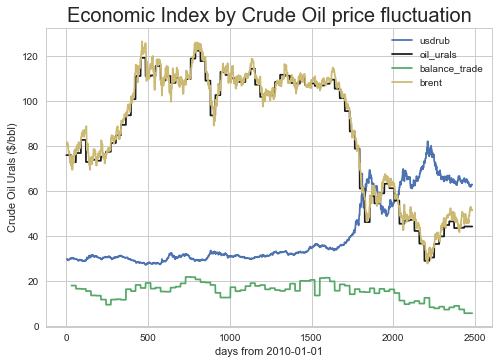

In [50]:
plt.plot(macro.usdrub, c="b")
#X = np.linspace(0,2500,len(macro.oil_urals))
plt.plot( macro.oil_urals, c="k")
plt.plot( macro.balance_trade, c="g")
plt.plot( macro.brent, c="y")
# plt.plot(macro.net_capital_export, c ='b')

plt.title('Economic Index by Crude Oil price fluctuation',size = 20)
plt.xlabel('days from 2010-01-01')
plt.ylabel('Crude Oil Urals ($/bbl)')
plt.legend()
plt.show()
## 2012년 말에 oil 가격 의 큰 변동폭이 있음을 알려준다 이시기는 월별 거래가격 평균값에서 큰 변동폭을 보인 12월 4분기와 일치한다
## Crud oil과 Brent Oil 가격이 올라가면 Ruble/USD 가격이 주츰하며(루블강세), 2015년에 오일가격이 하락하면서 Ruble/USD 가격이 상승함에 따라 달러가 강세 

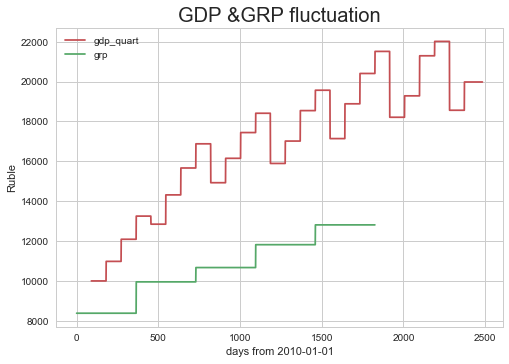

In [51]:
plt.plot( macro.gdp_quart, c="r")

plt.plot( macro.grp, c="g")
plt.title('GDP &GRP fluctuation',size = 20)
plt.xlabel('days from 2010-01-01')
plt.ylabel('Ruble')
plt.legend()
plt.show()
## macro.grp.isnull().sum() ## 658개의 데이터 nan값이 있음
## 시기에 따른 GDP와 GRP 의 변동이 시즌별로 생성되며 총 변화량은 상승세를 보인다 

## 각 Major Macro Feature들과 price_doc 상관계수 구하기 
### 시계열에 따른 train 데이터와 macro 데이터 스케일링

 * 2010 년1월~ 2016년 10월: 2483 개 데이터
 * macro 2011년 8월~ 2015년 6월 로 스케일링
 * macro 2011년 8월~ 2015년 6월 로 스케일링된 feature들의 월평균값 

In [52]:
macro['yearmonth'] = macro['timestamp'].apply(lambda x: x[:4]+x[5:7]) ## 년도&월 별로 정리

grouped_by_timestamp = macro.groupby('yearmonth')
#macro['yearmonth'] ## 2010 년1월~ 2016년 10월 ## 2483 개 데이터
## index 577 부터 201108 시작~ index 2006 = 2015년 6월 마지막
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
#train['yearmonth'] ## 2011년 8월~ 2015년 6월 ## 21570 개 데이터
#train['yearmonth']
#grouped_by_timestamp.groups
# macro['yearmonth'].iloc[577:2007] ## macro 2011년 8월~ 2015년 6월 로 스케일링
#pd.DataFrame(macro['yearmonth'].iloc[577:2007]) ## 1430 데이터 
#macro.iloc[577:2007]# .isnull().any().sum() ## 42개의 feature들이 nan값 포함 

In [53]:
mean_by_time = train.groupby('yearmonth')['price_doc'].aggregate(np.mean) ## 47 rows
# macro.groupby('yearmonth')
group_by_time = macro.iloc[577:2007].groupby('yearmonth').aggregate(np.mean) ##47 rows 2011년8월~2015년 6월
new_macro_features = pd.concat([group_by_time, mean_by_time], axis = 1)
new_macro_features ## macro 2011년 8월~ 2015년 6월 로 스케일링된 feature들의 월평균값 

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,price_doc
yearmonth,,,,,,,,,,,,,,,,,,,,,
201108,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.812458,41.298690,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,6.000000e+06
201109,111.2900,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,30.677023,42.212883,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,5.459434e+06
201110,108.2400,15663.6,5.0,353.0,436.5,86.721,17.199,18.1,31.256310,42.845948,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,5.565460e+06
201111,110.4300,15663.6,5.0,354.7,440.5,86.721,17.629,18.1,30.847800,41.829330,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,6.117020e+06
201112,107.9000,15663.6,5.0,356.2,444.6,86.721,19.066,18.1,31.535197,41.494119,...,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,5.920783e+06
201201,109.9100,16876.6,5.2,357.8,445.4,100.000,21.939,34.4,31.354555,40.431187,...,8522.0,603.0,0.45070,1309.0,288177.0,23.01,67.85,42551.0,232840.2,6.987618e+06
201202,119.0300,16876.6,5.2,359.5,444.3,100.000,21.832,34.4,29.784076,39.420041,...,8522.0,603.0,0.45070,1309.0,288177.0,23.01,67.85,42551.0,232840.2,6.575422e+06
201203,122.5200,16876.6,5.2,360.9,449.0,100.000,20.858,34.4,29.341429,38.768281,...,8522.0,603.0,0.45070,1309.0,288177.0,23.01,67.85,42551.0,232840.2,6.894996e+06
201204,117.8700,14925.0,4.7,363.0,458.7,100.000,19.639,33.6,29.471937,38.817267,...,8522.0,603.0,0.45070,1309.0,288177.0,23.01,67.85,42551.0,232840.2,6.942728e+06


In [ ]:
#new_macro_features.corr()

## 각 Major Macro Feature들과 price_doc 상관계수 구하기 
## Major Macro Feature's Corelations with price_doc
* ## price_doc과 제일 상관계수가 높은  feature들을 절대값 씌워 내림차순한후 상관계수 0.5 이상만 출력 

In [385]:
new_macro_features.corr()
## 각 Major Macro Feature들과 price_doc 상관계수 구하기 
## Major Macro Feature's Corelations with price_doc
corrmat = new_macro_features.corr()
print(len(corrmat.price_doc))
pd.DataFrame(corrmat.price_doc)

97


,price_doc
oil_urals,-0.701517
gdp_quart,0.649521
gdp_quart_growth,-0.629956
cpi,0.822130
ppi,0.775506
gdp_deflator,0.833331
balance_trade,0.065977
balance_trade_growth,0.610675
usdrub,0.753241
eurrub,0.765848


In [386]:
b = abs(pd.DataFrame(corrmat.price_doc)) ## 절대값 
top_corr = b.sort_values('price_doc',ascending=False)
top_corr[b.price_doc > 0.5] 
## price_doc과 제일 상관계수가 높은  feature들을 절대값 씌워 내림차순한후 상관계수 0.5 이상만 출력 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,price_doc
price_doc,1.000000
bandwidth_sports,0.855994
load_of_teachers_school_per_teacher,0.850210
gdp_deflator,0.833331
fixed_basket,0.830398
gdp_annual_growth,0.830213
salary,0.827129
provision_nurse,0.826526
turnover_catering_per_cap,0.824754
cpi,0.822130


### Macro Features 중 price_doc과 제일 영향을 미치는 macro feature들을 보여줌 (상관계수로 파악) 

* price_doc과 제일 상관계수가 높은  feature들을 절대값 씌워 내림차순한후 상관계수 0.5 이상만 출력 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


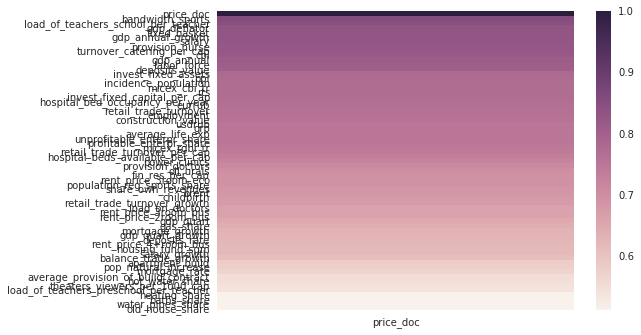

In [387]:
sns.heatmap(top_corr[b.price_doc > 0.5])

## Macro Groups Division

### Roadmap for Data Pre-processing (only numerical)
* Data to preprocess (총 16 지표)- 임의로 분류하여 설정(서로 관계가 있음을 가정) 
  * International_Index
  * Trade_Index
  * Domestic_Index
  * Resional_index
  * Labor_index
  * Income_Index
  * Household_Index
  * Retail_index
  * Investment_index
  * Distribution_Index
  * Demography_Index
  * Public_Infa_Index
  * National_service_Index
  * Rent_Price_Index
  * Leisure_Price_Index
  * Apartment_Index 

In [388]:
macro.columns

Index(['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi',
       'gdp_deflator', 'balance_trade', 'balance_trade_growth', 'usdrub',
       ...
       'turnover_catering_per_cap', 'theaters_viewers_per_1000_cap',
       'seats_theather_rfmin_per_100000_cap', 'museum_visitis_per_100_cap',
       'bandwidth_sports', 'population_reg_sports_share',
       'students_reg_sports_share', 'apartment_build', 'apartment_fund_sqm',
       'yearmonth'],
      dtype='object', length=101)

In [389]:
International_Index = ['oil_urals', 'balance_trade', 'balance_trade_growth', 'usdrub','eurrub','brent']
Trade_Index = ['net_capital_export','rts','micex','micex_rgbi_tr', 'micex_cbi_tr']
Domestic_Index = ['gdp_quart', 'gdp_quart_growth','cpi', 'ppi','gdp_deflator','gdp_annual','gdp_annual_growth','average_provision_of_build_contract','average_provision_of_build_contract_moscow']
Regional_index = ['grp', 'grp_growth','fin_res_per_cap']
Labor_index = ['labor_force','unemployment','employment']
Income_Index = ['income_per_cap','real_dispos_income_per_cap_growth','salary','salary_growth','overdue_wages_per_cap']
Household_Index = ['deposits_value','deposits_growth','deposits_rate','mortgage_value', 'mortgage_growth', 'mortgage_rate','housing_fund_sqm','lodging_sqm_per_cap']
Retail_index = ['fixed_basket', 'retail_trade_turnover','retail_trade_turnover_per_cap', 'retail_trade_turnover_growth','provision_retail_space_sqm','provision_retail_space_modern_sqm']
Investment_index = ['invest_fixed_capital_per_cap', 'invest_fixed_assets','invest_fixed_assets_phys','construction_value']
Distribution_Index = ['profitable_enterpr_share', 'unprofitable_enterpr_share','share_own_revenues']
Demography_Index = ['marriages_per_1000_cap', 'divorce_rate','pop_natural_increase', 'pop_migration','pop_total_inc', 'childbirth', 'mortality','average_life_exp', 'infant_mortarity_per_1000_cap','perinatal_mort_per_1000_cap', 'incidence_population']
Public_Infa_Index = ['water_pipes_share', 'baths_share','sewerage_share', 'gas_share', 'hot_water_share','electric_stove_share', 'heating_share', 'old_house_share']
National_service_Index = ['turnover_catering_per_cap','load_of_teachers_preschool_per_teacher', 'load_of_teachers_school_per_teacher','students_state_oneshift', 'provision_doctors', 'provision_nurse','load_on_doctors', 'power_clinics', 'hospital_beds_available_per_cap','hospital_bed_occupancy_per_year']
Rent_Price_Index = ['rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus','rent_price_1room_bus', 'rent_price_3room_eco', 'rent_price_2room_eco','rent_price_1room_eco']
Leisure_Price_Index = ['theaters_viewers_per_1000_cap', 'seats_theather_rfmin_per_100000_cap',
       'museum_visitis_per_100_cap', 'bandwidth_sports',
       'population_reg_sports_share', 'students_reg_sports_share']
Apartment_Index = ['apartment_build', 'apartment_fund_sqm']
## 이상있음'child_on_acc_pre_school' 'modern_education_share'\n 'old_education_build_share'

In [390]:
#new_macro_features ## 2011년 8월~2015년 6월 월별('yearmonth')로 scaling 된 data
macro[International_Index].isnull().sum()

oil_urals                0
balance_trade           31
balance_trade_growth    90
usdrub                   3
eurrub                   3
brent                    3
dtype: int64

In [391]:
macro.iloc[577:2007].isnull().sum() ## 2011 년8월~ 2015년 6월

timestamp                                        0
oil_urals                                        0
gdp_quart                                        0
gdp_quart_growth                                 0
cpi                                              0
ppi                                              0
gdp_deflator                                     0
balance_trade                                    0
balance_trade_growth                             0
usdrub                                           0
eurrub                                           0
brent                                            0
net_capital_export                               0
gdp_annual                                       0
gdp_annual_growth                                0
average_provision_of_build_contract              0
average_provision_of_build_contract_moscow       0
rts                                              0
micex                                            0
micex_rgbi_tr                  

In [392]:
concated= pd.concat((new_macro_features[International_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## eurrub & price_doc 제일 높음
#sns.heatmap(concated.corr())

,oil_urals,balance_trade,balance_trade_growth,usdrub,eurrub,brent,price_doc
oil_urals,1.000000,0.350283,-0.529107,-0.966911,-0.919074,0.998462,-0.701517
brent,0.998462,0.365772,-0.511103,-0.965270,-0.917021,1.000000,-0.683890
balance_trade,0.350283,1.000000,0.252590,-0.296776,-0.253357,0.365772,0.065977
balance_trade_growth,-0.529107,0.252590,1.000000,0.593037,0.565129,-0.511103,0.610675
usdrub,-0.966911,-0.296776,0.593037,1.000000,0.975089,-0.965270,0.753241
eurrub,-0.919074,-0.253357,0.565129,0.975089,1.000000,-0.917021,0.765848
price_doc,-0.701517,0.065977,0.610675,0.753241,0.765848,-0.683890,1.000000


In [393]:
concated= pd.concat((new_macro_features[Trade_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## micex_cbi_tr & price_doc 제일 높음
#sns.heatmap(concated.corr())

,net_capital_export,rts,micex,micex_rgbi_tr,micex_cbi_tr,price_doc
rts,0.439375,1.000000,-0.299972,0.866586,-0.721255,-0.773193
micex_rgbi_tr,0.205144,0.866586,-0.484290,1.000000,-0.474855,-0.746370
net_capital_export,1.000000,0.439375,-0.194245,0.205144,-0.488514,-0.323912
micex,-0.194245,-0.299972,1.000000,-0.484290,0.340654,0.391061
micex_cbi_tr,-0.488514,-0.721255,0.340654,-0.474855,1.000000,0.774683
price_doc,-0.323912,-0.773193,0.391061,-0.746370,0.774683,1.000000


In [394]:
concated= pd.concat((new_macro_features[Domestic_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## gdp_deflator & price_doc 제일 높음 but 값들이 다양한 cpi 선택 

,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,price_doc
gdp_annual_growth,-0.765771,0.783665,-0.912430,-0.862254,-0.880574,-0.852912,1.000000,-0.710066,-0.079093,-0.830213
gdp_quart_growth,-0.538443,1.000000,-0.892139,-0.873575,-0.843486,-0.821075,0.783665,-0.566880,-0.056490,-0.629956
average_provision_of_build_contract_moscow,-0.091879,-0.056490,0.229821,0.172307,0.002261,-0.053124,-0.079093,-0.180982,1.000000,0.260112
average_provision_of_build_contract,0.745822,-0.566880,0.665397,0.639227,0.603443,0.595982,-0.710066,1.000000,-0.180982,0.549068
gdp_quart,1.000000,-0.538443,0.735460,0.682672,0.772340,0.762931,-0.765771,0.745822,-0.091879,0.649521
ppi,0.682672,-0.873575,0.958694,1.000000,0.880167,0.852813,-0.862254,0.639227,0.172307,0.775506
gdp_annual,0.762931,-0.821075,0.880879,0.852813,0.995229,1.000000,-0.852912,0.595982,-0.053124,0.812010
cpi,0.735460,-0.892139,1.000000,0.958694,0.916646,0.880879,-0.912430,0.665397,0.229821,0.822130
gdp_deflator,0.772340,-0.843486,0.916646,0.880167,1.000000,0.995229,-0.880574,0.603443,0.002261,0.833331
price_doc,0.649521,-0.629956,0.822130,0.775506,0.833331,0.812010,-0.830213,0.549068,0.260112,1.000000


In [395]:
concated= pd.concat((new_macro_features[Regional_index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## grp & price_doc 제일 높음 but Nan 값 있음


,grp,grp_growth,fin_res_per_cap,price_doc
fin_res_per_cap,-0.906651,0.164489,1.000000,-0.695364
grp_growth,-0.423818,1.000000,0.164489,-0.466856
grp,1.000000,-0.423818,-0.906651,0.751644
price_doc,0.751644,-0.466856,-0.695364,1.000000


In [396]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
import datetime
import statsmodels.api as sm
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
macro = pd.read_csv('data/macro.csv')
macro['yearmonth'] = macro['timestamp'].apply(lambda x: x[:4]+x[5:7]) ## 년도&월 별로 정리

grouped_by_timestamp = macro.groupby('yearmonth')
#macro['yearmonth'] ## 2010 년1월~ 2016년 10월 ## 2483 개 데이터
## index 577 부터 201108 시작~ index 2006 = 2015년 6월 마지막
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
#train['yearmonth'] ## 2011년 8월~ 2015년 6월 ## 21570 개 데이터
#train['yearmonth']
#grouped_by_timestamp.groups
# macro['yearmonth'].iloc[577:2007] ## macro 2011년 8월~ 2015년 6월 로 스케일링
#pd.DataFrame(macro['yearmonth'].iloc[577:2007]) ## 1430 데이터 
#macro.iloc[577:2007]# .isnull().any().sum() ## 42개의 feature들이 nan값 포함 
mean_by_time = train.groupby('yearmonth')['price_doc'].aggregate(np.mean) ## 47 rows
# macro.groupby('yearmonth')
group_by_time = macro.iloc[577:2007].groupby('yearmonth').aggregate(np.mean) ##47 rows 2011년8월~2015년 6월
new_macro_features = pd.concat([group_by_time, mean_by_time], axis = 1)

dfY_1 = sm.add_constant(new_macro_features['price_doc'])
dfX__1 = new_macro_features['grp'].loc[:'201412'] ## 41개 데이터
dfY__1 = new_macro_features['price_doc'].loc[:'201412']
dfX__1.values.reshape(41,1)
dfY__1.values.reshape(41,1)

dfY1 = sm.add_constant(dfY__1)
model1 = sm.OLS(dfX__1,dfY1)
result1 = model1.fit()
#a = new_macro_features['price_doc'][41:].reshape(6,1)
result1.predict(dfY_1)
new_macro_features['grp'][41:] = result1.predict(dfY_1)[41:]

new_macro_features['grp']## regression model 측정으로 Nan 값들 imputation 


yearmonth
201108     9948.772800
201109     9948.772800
201110     9948.772800
201111     9948.772800
201112     9948.772800
201201    10666.870500
201202    10666.870500
201203    10666.870500
201204    10666.870500
201205    10666.870500
201206    10666.870500
201207    10666.870500
201208    10666.870500
201209    10666.870500
201210    10666.870500
201211    10666.870500
201212    10666.870500
201301    11814.897400
201302    11814.897400
201303    11814.897400
201304    11814.897400
201305    11814.897400
201306    11814.897400
201307    11814.897400
201308    11814.897400
201309    11814.897400
201310    11814.897400
201311    11814.897400
201312    11814.897400
201401    12808.573400
201402    12808.573400
201403    12808.573400
201404    12808.573400
201405    12808.573400
201406    12808.573400
201407    12808.573400
201408    12808.573400
201409    12808.573400
201410    12808.573400
201411    12808.573400
201412    12808.573400
201501    13439.548952
201502    13259.130298
2

In [397]:
concated= pd.concat((new_macro_features[Labor_index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## labor_force & price_doc 제일 높음


,labor_force,unemployment,employment,price_doc
unemployment,0.485316,1.000000,0.389030,0.430841
employment,0.970030,0.389030,1.000000,0.761718
labor_force,1.000000,0.485316,0.970030,0.809198
price_doc,0.809198,0.430841,0.761718,1.000000


In [398]:
concated= pd.concat((new_macro_features[Income_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## salary & price_doc 제일 높음


,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,overdue_wages_per_cap,price_doc
salary_growth,0.022426,0.569238,-0.487467,1.000000,0.529003,-0.620342
real_dispos_income_per_cap_growth,0.031718,1.000000,-0.338711,0.569238,0.737251,-0.433926
overdue_wages_per_cap,0.157336,0.737251,0.369852,0.529003,1.000000,0.083155
income_per_cap,1.000000,0.031718,0.162881,0.022426,0.157336,0.092857
salary,0.162881,-0.338711,1.000000,-0.487467,0.369852,0.827129
price_doc,0.092857,-0.433926,0.827129,-0.620342,0.083155,1.000000


In [399]:
concated= pd.concat((new_macro_features[Household_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## deposits_value & price_doc 제일 높음

,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,housing_fund_sqm,lodging_sqm_per_cap,price_doc
mortgage_growth,-0.866822,0.089723,-0.618333,-0.052986,1.000000,-0.869620,-0.804260,-0.609898,-0.631473
deposits_growth,-0.114630,1.000000,0.104470,0.253859,0.089723,-0.049898,-0.025610,0.052359,-0.063332
mortgage_value,0.283479,0.253859,0.187639,1.000000,-0.052986,-0.128856,0.227678,0.056888,0.135623
lodging_sqm_per_cap,0.394457,0.052359,0.220765,0.056888,-0.609898,0.548828,0.889661,1.000000,0.358208
mortgage_rate,0.699420,-0.049898,0.745969,-0.128856,-0.869620,1.000000,0.643049,0.548828,0.568581
housing_fund_sqm,0.754384,-0.025610,0.298130,0.227678,-0.804260,0.643049,1.000000,0.889661,0.620746
deposits_rate,0.610009,0.104470,1.000000,0.187639,-0.618333,0.745969,0.298130,0.220765,0.625113
deposits_value,1.000000,-0.114630,0.610009,0.283479,-0.866822,0.699420,0.754384,0.394457,0.806559
price_doc,0.806559,-0.063332,0.625113,0.135623,-0.631473,0.568581,0.620746,0.358208,1.000000


In [400]:
concated= pd.concat((new_macro_features[Retail_index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## fixed_basket & price_doc 제일 높음
## provision_retail_space_modern_sqm -> Nan 값 1277 개 

,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,provision_retail_space_sqm,provision_retail_space_modern_sqm,price_doc
retail_trade_turnover_growth,-0.761805,-0.393659,-0.345394,1.000000,-1.000000,NaN,-0.675003
provision_retail_space_sqm,0.767149,1.000000,1.000000,-1.000000,1.000000,NaN,0.483804
retail_trade_turnover_per_cap,0.829897,0.997844,1.000000,-0.345394,1.000000,NaN,0.743390
retail_trade_turnover,0.850812,1.000000,0.997844,-0.393659,1.000000,NaN,0.764497
fixed_basket,1.000000,0.850812,0.829897,-0.761805,0.767149,NaN,0.830398
price_doc,0.830398,0.764497,0.743390,-0.675003,0.483804,NaN,1.000000
provision_retail_space_modern_sqm,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [401]:
concated= pd.concat((new_macro_features[Investment_index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## invest_fixed_assets & price_doc 제일 높음


,invest_fixed_capital_per_cap,invest_fixed_assets,invest_fixed_assets_phys,construction_value,price_doc
invest_fixed_assets_phys,-0.416076,-0.422156,1.000000,-0.611173,-0.386710
construction_value,0.963740,0.966379,-0.611173,1.000000,0.759633
invest_fixed_capital_per_cap,1.000000,0.999775,-0.416076,0.963740,0.772480
invest_fixed_assets,0.999775,1.000000,-0.422156,0.966379,0.780645
price_doc,0.772480,0.780645,-0.386710,0.759633,1.000000


In [402]:
concated= pd.concat((new_macro_features[Distribution_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## unprofitable_enterpr_share & price_doc 제일 높음 그러나 profitable_enterpr_share 값이 더 다양 그러나 Nan 값 2015년1월~6월 
#new_macro_features['profitable_enterpr_share']

,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,price_doc
profitable_enterpr_share,1.000000,-1.000000,-0.761083,-0.750456
share_own_revenues,-0.761083,0.761083,1.000000,0.688819
unprofitable_enterpr_share,-1.000000,1.000000,0.761083,0.750456
price_doc,-0.750456,0.750456,0.688819,1.000000


In [403]:
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
concated= pd.concat((new_macro_features[Distribution_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## profitable_enterpr_share & price_doc 제일 높음 but nan 값 있음
dfY_ = sm.add_constant(new_macro_features['price_doc'])
dfX__ = new_macro_features['profitable_enterpr_share'].loc[:'201412'] ## 41개 데이터
dfY__ = new_macro_features['price_doc'].loc[:'201412']
dfX__.values.reshape(41,1)
dfY__.values.reshape(41,1)

dfY = sm.add_constant(dfY__)
model = sm.OLS(dfX__,dfY)
result = model.fit()
#a = new_macro_features['price_doc'][41:].reshape(6,1)

new_macro_features['profitable_enterpr_share'][41:] = result.predict(dfY_)[41:]
# result.params
#y = 8.672338e-01*x + -2.769966e-08
new_macro_features['profitable_enterpr_share'] ## regression model 측정으로 Nan 값들 imputation 

yearmonth
201108    0.708000
201109    0.708000
201110    0.708000
201111    0.708000
201112    0.708000
201201    0.702000
201202    0.702000
201203    0.702000
201204    0.702000
201205    0.702000
201206    0.702000
201207    0.702000
201208    0.702000
201209    0.702000
201210    0.702000
201211    0.702000
201212    0.702000
201301    0.685000
201302    0.685000
201303    0.685000
201304    0.685000
201305    0.685000
201306    0.685000
201307    0.685000
201308    0.685000
201309    0.685000
201310    0.685000
201311    0.685000
201312    0.685000
201401    0.646000
201402    0.646000
201403    0.646000
201404    0.646000
201405    0.646000
201406    0.646000
201407    0.646000
201408    0.646000
201409    0.646000
201410    0.646000
201411    0.646000
201412    0.646000
201501    0.636262
201502    0.640551
201503    0.635516
201504    0.647909
201505    0.638982
201506    0.647958
Name: profitable_enterpr_share, dtype: float64

In [404]:
concated= pd.concat((new_macro_features[Demography_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## incidence_population & price_doc 제일 높음 but Nan 값 있음 -> average_life_exp 선택


,marriages_per_1000_cap,divorce_rate,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,price_doc
incidence_population,-0.234690,-0.043210,-0.757409,0.277051,0.183208,-0.615776,0.382502,-0.933256,0.464958,0.065873,1.000000,-0.774871
infant_mortarity_per_1000_cap,-0.957175,-0.360130,0.085392,0.960958,0.929775,0.401445,0.419686,-0.600844,1.000000,0.881308,0.464958,-0.338643
pop_migration,-0.932365,-0.188991,0.339813,1.000000,0.994780,0.533282,0.186644,-0.374776,0.960958,0.867698,0.277051,-0.216041
pop_total_inc,-0.917543,-0.155381,0.434014,0.994780,1.000000,0.597001,0.121136,-0.278259,0.929775,0.864830,0.183208,-0.147605
divorce_rate,0.530606,1.000000,0.236442,-0.188991,-0.155381,-0.393242,-0.935504,0.394735,-0.360130,-0.620076,-0.043210,-0.088422
perinatal_mort_per_1000_cap,-0.980371,-0.620076,0.310168,0.867698,0.864830,0.741308,0.525183,-0.324912,0.881308,1.000000,0.065873,0.005272
marriages_per_1000_cap,1.000000,0.530606,-0.225080,-0.932365,-0.917543,-0.621394,-0.497430,0.450201,-0.957175,-0.980371,-0.234690,0.138261
mortality,-0.497430,-0.935504,-0.341526,0.186644,0.121136,0.315955,1.000000,-0.352249,0.419686,0.525183,0.382502,0.144556
pop_natural_increase,-0.225080,0.236442,1.000000,0.339813,0.434014,0.783820,-0.341526,0.761760,0.085392,0.310168,-0.757409,0.577774
childbirth,-0.621394,-0.393242,0.783820,0.533282,0.597001,1.000000,0.315955,0.536239,0.401445,0.741308,-0.615776,0.678757


In [405]:
macro['yearmonth'] = macro['timestamp'].apply(lambda x: x[:4]+x[5:7]) ## 년도&월 별로 정리

grouped_by_timestamp = macro.groupby('yearmonth')
#macro['yearmonth'] ## 2010 년1월~ 2016년 10월 ## 2483 개 데이터
## index 577 부터 201108 시작~ index 2006 = 2015년 6월 마지막
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
#train['yearmonth'] ## 2011년 8월~ 2015년 6월 ## 21570 개 데이터
#train['yearmonth']
#grouped_by_timestamp.groups
# macro['yearmonth'].iloc[577:2007] ## macro 2011년 8월~ 2015년 6월 로 스케일링
#pd.DataFrame(macro['yearmonth'].iloc[577:2007]) ## 1430 데이터 
#macro.iloc[577:2007]# .isnull().any().sum() ## 42개의 feature들이 nan값 포함 
mean_by_time = train.groupby('yearmonth')['price_doc'].aggregate(np.mean) ## 47 rows
# macro.groupby('yearmonth')
group_by_time = macro.iloc[577:2007].groupby('yearmonth').aggregate(np.mean) ##47 rows 2011년8월~2015년 6월
new_macro_features = pd.concat([group_by_time, mean_by_time], axis = 1)
new_macro_features ['gas_share']## macro 2011년 8월~ 2015년 6월 로 스케일링된 feature들의 월평균값 
concated= pd.concat((new_macro_features[Public_Infa_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## gas_share & price_doc 제일 높음,Nan 값 있음


,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,price_doc
gas_share,0.239732,0.239732,0.168811,1.000000,0.327183,-0.703455,0.239732,-0.239732,-0.640369
hot_water_share,0.995157,0.995157,0.986465,0.327183,1.000000,0.403971,0.995157,-0.995157,-0.548778
heating_share,1.000000,1.000000,0.995791,0.239732,0.995157,0.473593,1.000000,-1.000000,-0.512205
water_pipes_share,1.000000,1.000000,0.995791,0.239732,0.995157,0.473593,1.000000,-1.000000,-0.512205
baths_share,1.000000,1.000000,0.995791,0.239732,0.995157,0.473593,1.000000,-1.000000,-0.512205
sewerage_share,0.995791,0.995791,1.000000,0.168811,0.986465,0.546933,0.995791,-0.995791,-0.456730
electric_stove_share,0.473593,0.473593,0.546933,-0.703455,0.403971,1.000000,0.473593,-0.473593,0.274491
old_house_share,-1.000000,-1.000000,-0.995791,-0.239732,-0.995157,-0.473593,-1.000000,1.000000,0.512205
price_doc,-0.512205,-0.512205,-0.456730,-0.640369,-0.548778,0.274491,-0.512205,0.512205,1.000000


In [406]:
##'gas_share' value의  Nan 값들 Imputation
dfY_2 = sm.add_constant(new_macro_features['price_doc'])
dfX__2 = new_macro_features['gas_share'].loc[:'201412'] ## 41개 데이터
dfY__2 = new_macro_features['price_doc'].loc[:'201412']
dfX__2.values.reshape(41,1)
dfY__2.values.reshape(41,1)

dfY2 = sm.add_constant(dfY__2)

model2 = sm.OLS(dfX__2,dfY2)
result2 = model2.fit()
#a = new_macro_features['price_doc'][41:].reshape(6,1)
new_macro_features ['gas_share'][41:] = result2.predict(dfY_2)[41:]
new_macro_features['gas_share']

yearmonth
201108    43.900000
201109    43.900000
201110    43.900000
201111    43.900000
201112    43.900000
201201    44.100000
201202    44.100000
201203    44.100000
201204    44.100000
201205    44.100000
201206    44.100000
201207    44.100000
201208    44.100000
201209    44.100000
201210    44.100000
201211    44.100000
201212    44.100000
201301    43.600000
201302    43.600000
201303    43.600000
201304    43.600000
201305    43.600000
201306    43.600000
201307    43.600000
201308    43.600000
201309    43.600000
201310    43.600000
201311    43.600000
201312    43.600000
201401    43.300000
201402    43.300000
201403    43.300000
201404    43.300000
201405    43.300000
201406    43.300000
201407    43.300000
201408    43.300000
201409    43.300000
201410    43.300000
201411    43.300000
201412    43.300000
201501    43.186596
201502    43.234950
201503    43.178187
201504    43.317913
201505    43.217267
201506    43.318466
Name: gas_share, dtype: float64

In [407]:
concated= pd.concat((new_macro_features[National_service_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## load_of_teachers_school_per_teacher & price_doc 제일 높음
#'child_on_acc_pre_school' 'modern_education_share'\n 'old_education_build_share' - 이상있음

,turnover_catering_per_cap,load_of_teachers_preschool_per_teacher,load_of_teachers_school_per_teacher,students_state_oneshift,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,price_doc
provision_nurse,-0.857953,-0.743831,-0.991348,0.359102,0.883813,1.000000,0.855227,0.796268,0.770828,0.836466,-0.826526
hospital_bed_occupancy_per_year,-0.964912,-0.809507,-0.877843,0.535426,0.920467,0.836466,0.391199,0.875208,0.986666,1.000000,-0.768301
hospital_beds_available_per_cap,-0.918256,-0.579932,-0.807999,0.594459,0.930189,0.770828,0.374710,0.791411,1.000000,0.986666,-0.734212
power_clinics,-0.967684,-0.998362,-0.864708,0.144847,0.674580,0.796268,0.195072,1.000000,0.791411,0.875208,-0.724835
provision_doctors,-0.801161,-0.339491,-0.876750,0.819258,1.000000,0.883813,0.687255,0.674580,0.930189,0.920467,-0.711045
load_on_doctors,-0.523166,0.606743,-0.841323,0.376076,0.687255,0.855227,1.000000,0.195072,0.374710,0.391199,-0.663787
students_state_oneshift,-0.168027,0.999337,-0.256359,1.000000,0.819258,0.359102,0.376076,0.144847,0.594459,0.535426,-0.185014
load_of_teachers_preschool_per_teacher,0.941344,1.000000,0.894389,0.999337,-0.339491,-0.743831,0.606743,-0.998362,-0.579932,-0.809507,0.542303
turnover_catering_per_cap,1.000000,0.941344,0.888419,-0.168027,-0.801161,-0.857953,-0.523166,-0.967684,-0.918256,-0.964912,0.824754
load_of_teachers_school_per_teacher,0.888419,0.894389,1.000000,-0.256359,-0.876750,-0.991348,-0.841323,-0.864708,-0.807999,-0.877843,0.850210


In [408]:
concated= pd.concat((new_macro_features[Rent_Price_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## rent_price_3room_eco & price_doc 제일 높음

,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,price_doc
rent_price_1room_eco,0.068548,0.154869,0.224205,0.309348,0.260537,0.060496,1.000000,0.220810
rent_price_2room_eco,0.260320,0.163843,0.306671,0.241698,0.241130,1.000000,0.060496,0.233592
rent_price_1room_bus,0.328811,0.243116,0.696861,1.000000,0.560395,0.241698,0.309348,0.328758
rent_price_4+room_bus,1.000000,0.469170,0.549154,0.328811,0.512961,0.260320,0.068548,0.622718
rent_price_2room_bus,0.549154,0.580875,1.000000,0.696861,0.869559,0.306671,0.224205,0.661689
rent_price_3room_bus,0.469170,1.000000,0.580875,0.243116,0.628373,0.163843,0.154869,0.662317
rent_price_3room_eco,0.512961,0.628373,0.869559,0.560395,1.000000,0.241130,0.260537,0.694443
price_doc,0.622718,0.662317,0.661689,0.328758,0.694443,0.233592,0.220810,1.000000


In [409]:
concated= pd.concat((new_macro_features[Leisure_Price_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## bandwidth_sports & price_doc 제일 높음

,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,price_doc
seats_theather_rfmin_per_100000_cap,-0.883296,1.000000,-0.989176,0.284755,-0.594604,-0.994227,0.269798
students_reg_sports_share,0.928499,-0.994227,0.999210,1.000000,0.987804,1.000000,0.465839
museum_visitis_per_100_cap,0.942525,-0.989176,1.000000,0.999218,0.980834,0.999210,0.477436
theaters_viewers_per_1000_cap,1.000000,-0.883296,0.942525,0.928581,0.859357,0.928499,0.544305
population_reg_sports_share,0.859357,-0.594604,0.980834,0.943505,1.000000,0.987804,0.693796
bandwidth_sports,0.928581,0.284755,0.999218,1.000000,0.943505,1.000000,0.855994
price_doc,0.544305,0.269798,0.477436,0.855994,0.693796,0.465839,1.000000


In [410]:
concated= pd.concat((new_macro_features[Apartment_Index],new_macro_features['price_doc']),axis =1)
concated.corr().sort_values('price_doc',ascending=True)
## apartment_build & price_doc 제일 높음 -> Nan 값 있음 , 영향이 별로 없어서 삭제

,apartment_build,apartment_fund_sqm,price_doc
apartment_fund_sqm,-0.314926,1.000000,0.227223
apartment_build,1.000000,-0.314926,0.582052
price_doc,0.582052,0.227223,1.000000


In [411]:
* Data to preprocess (총 16 지표)- 임의로 분류하여 설정(서로 관계가 있음을 가정) 
  * International_Index
  * Trade_Index
  * Domestic_Index
  * Resional_index
  * Labor_index
  * Income_Index
  * Household_Index
  * Retail_index
  * Investment_index
  * Distribution_Index
  * Demography_Index
  * Public_Infa_Index
  * National_service_Index
  * Rent_Price_Index
  * Leisure_Price_Index
  * Apartment_Index 

SyntaxError: invalid syntax (<ipython-input-411-4fd989a8bd89>, line 1)

## 각 division 에서 Target Value와 높은 상관계수 높은 11개 항목
### 각 feature들간의 상관계수 확인
<center>Index Division</center>|<center>Selected Index </center>
:---:|:---
International_Index|eurrub
Trade_Index|micex_cbi_tr
Domestic_Index|cpi
Resional_index|grp
Labor_index|labor_force
Income_Index| salary
Household_Index| deposits_value
Retail_index | fixed_basket
Investment_index| invest_fixed_assets
Distribution_Index| profitable_enterpr_share
Demography_Index| average_life_exp
Public_Infa_Index| gas_share
National_service_Index| load_of_teachers_school_per_teacher
Rent_Price_Index|Rent_Price_Indexrent_price_3room_eco
Leisure_Price_Index|bandwidth_sports
apartment_build | 영향이 별로 없어 삭제

## problems:
1. 대부분 featrue 들끼리 높은 상관관계를 가짐 
2. OLS 결과 높은 std err 을 가짐
3. 독립변수들간의 상관계수가 높음 ( original macro feature들의 상관계수가 원래 높음) 
4. 아웃라이어가 있어도 뺄수가 없음( 데이터는 시계열로 각 월평균으로 집계된 결과 이므로 하나라도 빼면 큰타격을 입음, original 데이터가 월별로 값이 같아서 월평균 한것과 안한것의 차이는 별로 없음)  

In [417]:
selected = ['eurrub','micex_cbi_tr','cpi','grp','labor_force','salary','deposits_value','fixed_basket','invest_fixed_assets','profitable_enterpr_share','average_life_exp','gas_share','load_of_teachers_school_per_teacher','rent_price_3room_eco','bandwidth_sports']

In [418]:
concated= pd.concat((new_macro_features[selected],new_macro_features['price_doc']),axis =1)
concated.corr()

,eurrub,micex_cbi_tr,cpi,grp,labor_force,salary,deposits_value,fixed_basket,invest_fixed_assets,profitable_enterpr_share,average_life_exp,gas_share,load_of_teachers_school_per_teacher,rent_price_3room_eco,bandwidth_sports,price_doc
eurrub,1.000000,0.673857,0.841795,0.667020,0.677979,0.742017,0.776076,0.842797,0.602456,-0.757136,0.696341,-0.722794,0.802481,0.672999,0.842955,0.765848
micex_cbi_tr,0.673857,1.000000,0.927899,0.980206,0.923625,0.975744,0.980047,0.948923,0.933965,-0.906633,0.950398,-0.908224,0.826147,0.794950,0.933061,0.774683
cpi,0.841795,0.927899,1.000000,0.949422,0.848689,0.917744,0.950174,0.992803,0.829280,-0.931712,0.860337,-0.841424,0.902450,0.776014,0.963423,0.822130
grp,0.667020,0.980206,0.949422,1.000000,0.971559,0.999952,0.966250,0.966118,0.945331,-0.953904,0.967053,-0.922856,0.825875,0.788929,0.977710,0.751644
labor_force,0.677979,0.923625,0.848689,0.971559,1.000000,0.965396,0.923171,0.871322,0.942809,-0.968073,0.913417,-0.873140,0.893680,0.817042,0.919371,0.809198
salary,0.742017,0.975744,0.917744,0.999952,0.965396,1.000000,0.974525,0.944890,0.948185,-0.955264,0.970730,-0.938259,0.872392,0.812687,0.964815,0.827129
deposits_value,0.776076,0.980047,0.950174,0.966250,0.923171,0.974525,1.000000,0.972124,0.928104,-0.902149,0.938673,-0.902854,0.855082,0.830762,0.947581,0.806559
fixed_basket,0.842797,0.948923,0.992803,0.966118,0.871322,0.944890,0.972124,1.000000,0.860952,-0.929104,0.897844,-0.877738,0.892130,0.784746,0.972624,0.830398
invest_fixed_assets,0.602456,0.933965,0.829280,0.945331,0.942809,0.948185,0.928104,0.860952,1.000000,-0.832727,0.876667,-0.801781,0.823836,0.775755,0.863422,0.780645
profitable_enterpr_share,-0.757136,-0.906633,-0.931712,-0.953904,-0.968073,-0.955264,-0.902149,-0.929104,-0.832727,1.000000,-0.932854,0.924706,-0.886025,-0.780628,-0.995640,-0.750456


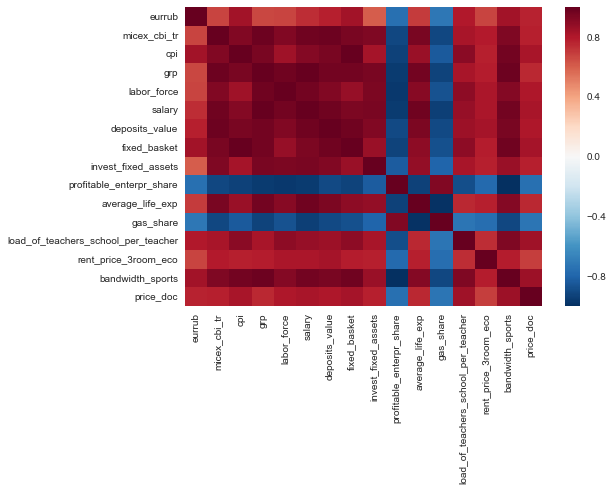

In [419]:
sns.heatmap(concated.corr())  ## 대부분 featrue 들끼리 높은 상관관계를 가짐 

In [420]:
new_macro_features[selected].isnull().sum()

eurrub                                 0
micex_cbi_tr                           0
cpi                                    0
grp                                    6
labor_force                            0
salary                                 0
deposits_value                         0
fixed_basket                           0
invest_fixed_assets                    0
profitable_enterpr_share               6
average_life_exp                       0
gas_share                              0
load_of_teachers_school_per_teacher    0
rent_price_3room_eco                   0
bandwidth_sports                       0
dtype: int64

## 레버리지 계산

In [423]:
concated= pd.concat((new_macro_features[selected],new_macro_features['price_doc']),axis =1)
import statsmodels.api as sm

X30 = new_macro_features[selected]
Y3 = new_macro_features['price_doc']
X3= sm.add_constant(X30)

X3.values.reshape(47,16)## 47*16
Y3.values.reshape(47,1) ## 47,

model3 = sm.OLS(Y3, X3) ## Nan 값이 없어야함 
result3 = model3.fit()

print(result3.summary())




LinAlgError: SVD did not converge

In [416]:
result4 = result3.resid
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.show()

NameError: name 'result3' is not defined

In [ ]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

In [ ]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

## feature selection by Lasso Regression 

In [227]:
new_macro_features = pd.concat([group_by_time, mean_by_time], axis = 1)

In [237]:
group_by_time
X = group_by_time.isnull().any()[lambda x : x == False]
X0=list(X.index)
X1= group_by_time[X0]
Y = mean_by_time
X1

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_school_per_teacher,students_state_oneshift,provision_nurse,load_on_doctors,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,apartment_fund_sqm
yearmonth,,,,,,,,,,,,,,,,,,,,,
201108,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.812458,41.298690,...,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
201109,111.2900,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,30.677023,42.212883,...,37.73,30.63,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
201110,108.2400,15663.6,5.0,353.0,436.5,86.721,17.199,18.1,31.256310,42.845948,...,38.10,31.11,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
201111,110.4300,15663.6,5.0,354.7,440.5,86.721,17.629,18.1,30.847800,41.829330,...,38.62,31.53,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
201112,107.9000,15663.6,5.0,356.2,444.6,86.721,19.066,18.1,31.535197,41.494119,...,37.93,30.74,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
201201,109.9100,16876.6,5.2,357.8,445.4,100.000,21.939,34.4,31.354555,40.431187,...,39.47,31.25,1453.830605,99.2666,96.5,8296.038659,8522.0,0.45070,288177.0,232840.2
201202,119.0300,16876.6,5.2,359.5,444.3,100.000,21.832,34.4,29.784076,39.420041,...,38.39,31.12,1453.830605,99.2666,96.5,8296.038659,8522.0,0.45070,288177.0,232840.2
201203,122.5200,16876.6,5.2,360.9,449.0,100.000,20.858,34.4,29.341429,38.768281,...,38.45,31.64,1453.830605,99.2666,96.5,8296.038659,8522.0,0.45070,288177.0,232840.2
201204,117.8700,14925.0,4.7,363.0,458.7,100.000,19.639,33.6,29.471937,38.817267,...,37.85,30.89,1453.830605,99.2666,96.5,8296.038659,8522.0,0.45070,288177.0,232840.2


In [276]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

alpha = np.logspace(-100,-50,3)

data1 = []

for i,a in enumerate(alpha):
    lasso = Lasso(alpha= a).fit(X1, Y)
    data1.append(pd.Series(np.hstack([lasso.intercept_,lasso.coef_])))
    
df_lasso = pd.DataFrame(data, index = alpha).T
df_lasso


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,1e-100,1e-75,1e-50
0,4.474479e+07,4.474479e+07,4.474479e+07
1,-3.629034e+04,-3.629034e+04,-3.629034e+04
2,-1.163181e+02,-1.163181e+02,-1.163181e+02
3,3.130163e+05,3.130163e+05,3.130163e+05
4,2.725425e+04,2.725425e+04,2.725425e+04
5,-1.246250e+03,-1.246250e+03,-1.246250e+03
6,-1.896126e+03,-1.896126e+03,-1.896126e+03
7,7.763491e+04,7.763491e+04,7.763491e+04
8,-8.028088e+03,-8.028088e+03,-8.028088e+03
9,5.919260e+02,5.919260e+02,5.919260e+02


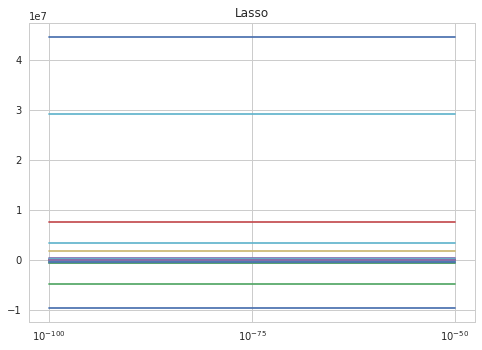

In [277]:
mpl.rcParams["font.family"] = 'DejaVu Sans'


ax2 = plt.plot()
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")
plt.show()

## VIF

In [379]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif#[lambda x: x <= 200]##inf is infinity - a value that is greater than any other value


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,2137.972066,oil_urals
1,75.606063,gdp_quart
2,206.705197,gdp_quart_growth
3,2087.572814,cpi
4,82.552033,ppi
5,inf,gdp_deflator
6,14.881844,balance_trade
7,56.261827,balance_trade_growth
8,3708.693740,usdrub
9,882.665212,eurrub


In [431]:
model5 = sm.OLS.from_formula("price_doc~scale(gdp_quart)+scale(balance_trade)+scale(ppi)+scale(balance_trade)+scale(net_capital_export)+scale(average_provision_of_build_contract_moscow)+scale(micex)+scale(deposits_growth)+scale(mortgage_value)+scale(income_per_cap)+scale(rent_price_3room_bus)+scale(rent_price_1room_bus)+scale(rent_price_2room_eco)+scale(rent_price_1room_eco)",data = new_macro_features)

In [381]:
result = model5.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     9.925
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           5.60e-08
Time:                        02:28:23   Log-Likelihood:                -667.03
No. Observations:                  47   AIC:                             1362.
Df Residuals:                      33   BIC:                             1388.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [432]:
selected_new =['price_doc','gdp_quart','balance_trade','ppi','balance_trade','net_capital_export','average_provision_of_build_contract_moscow','micex','deposits_growth','mortgage_value','income_per_cap','rent_price_3room_bus','rent_price_1room_bus','rent_price_2room_eco','rent_price_1room_eco']
selected1 =['grp','gas_share','profitable_enterpr_share'] 
##new_macro_features['grp'],new_macro_features['gas_share'],new_macro_features['profitable_enterpr_share'] 

In [433]:
new_macro_features[selected_new + selected1].corr()

,price_doc,gdp_quart,balance_trade,ppi,balance_trade,net_capital_export,average_provision_of_build_contract_moscow,micex,deposits_growth,mortgage_value,income_per_cap,rent_price_3room_bus,rent_price_1room_bus,rent_price_2room_eco,rent_price_1room_eco,grp,gas_share,profitable_enterpr_share
price_doc,1.000000,0.649521,0.065977,0.775506,0.065977,-0.323912,0.260112,0.391061,-0.063332,0.135623,0.092857,0.662317,0.328758,0.233592,0.220810,0.751644,-0.729959,-0.750456
gdp_quart,0.649521,1.000000,-0.137746,0.682672,-0.137746,-0.465905,-0.091879,0.433669,-0.006678,0.421038,0.227633,0.543778,0.437756,0.148480,0.338735,0.776242,-0.734303,-0.752493
balance_trade,0.065977,-0.137746,1.000000,-0.137655,1.000000,0.482360,-0.272108,-0.048428,0.042217,-0.177801,-0.085073,-0.056008,0.117846,-0.151218,0.034528,0.107251,0.052319,-0.107910
ppi,0.775506,0.682672,-0.137655,1.000000,-0.137655,-0.491983,0.172307,0.499655,-0.177282,0.200105,0.282060,0.818100,0.241761,0.203447,0.178352,0.874682,-0.765187,-0.854811
balance_trade,0.065977,-0.137746,1.000000,-0.137655,1.000000,0.482360,-0.272108,-0.048428,0.042217,-0.177801,-0.085073,-0.056008,0.117846,-0.151218,0.034528,0.107251,0.052319,-0.107910
net_capital_export,-0.323912,-0.465905,0.482360,-0.491983,0.482360,1.000000,0.064342,-0.194245,-0.094846,-0.105872,-0.124744,-0.273777,-0.011187,-0.009578,0.031678,-0.379700,0.287898,0.256032
average_provision_of_build_contract_moscow,0.260112,-0.091879,-0.272108,0.172307,-0.272108,0.064342,1.000000,0.440458,-0.011882,-0.098134,-0.004456,0.215126,-0.235299,0.105744,0.010128,-0.432725,0.053215,0.326189
micex,0.391061,0.433669,-0.048428,0.499655,-0.048428,-0.194245,0.440458,1.000000,0.008908,-0.112762,0.028883,0.397940,-0.218158,-0.095726,0.072582,-0.156116,-0.260720,0.155465
deposits_growth,-0.063332,-0.006678,0.042217,-0.177282,0.042217,-0.094846,-0.011882,0.008908,1.000000,0.253859,-0.114559,-0.221923,-0.056204,0.171382,-0.169649,-0.127845,0.130625,0.160377
mortgage_value,0.135623,0.421038,-0.177801,0.200105,-0.177801,-0.105872,-0.098134,-0.112762,0.253859,1.000000,0.269770,0.101695,0.466183,0.346935,0.269378,0.381546,-0.253876,-0.395945


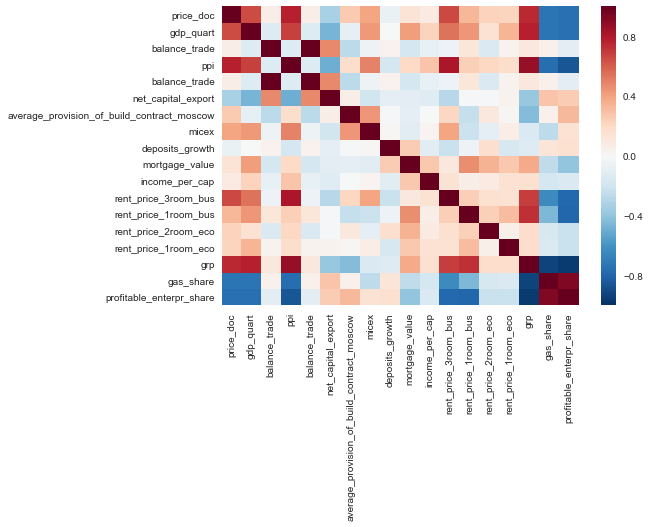

In [434]:
sns.heatmap(new_macro_features[selected_new+selected1].corr())

In [440]:
new_macro_features[['price_doc','balance_trade','ppi','gdp_quart','micex','grp']].corr()

,price_doc,balance_trade,ppi,gdp_quart,micex,grp
price_doc,1.000000,0.065977,0.775506,0.649521,0.391061,0.751644
balance_trade,0.065977,1.000000,-0.137655,-0.137746,-0.048428,0.107251
ppi,0.775506,-0.137655,1.000000,0.682672,0.499655,0.874682
gdp_quart,0.649521,-0.137746,0.682672,1.000000,0.433669,0.776242
micex,0.391061,-0.048428,0.499655,0.433669,1.000000,-0.156116
grp,0.751644,0.107251,0.874682,0.776242,-0.156116,1.000000


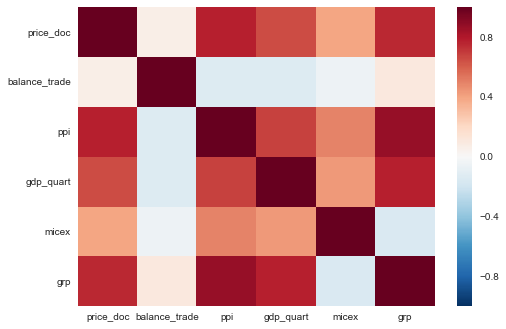

In [441]:
sns.heatmap(new_macro_features[['price_doc','balance_trade','ppi','gdp_quart','micex','grp']].corr())